Q1 Gender 

性别 1为男 2为女

Q2 IfShoeLover 

是否为潮鞋爱好者 1为是 2为否

Q3 

不同价格区间的鞋子的数量 1为0 2为1 3为2 4为3 5为大于3

SubQ3 LessThan500 

价格低于500元的鞋子的数量

SubQ3 500To1000 

价格在500-100元的鞋子的数量

SubQ3 1000To1500 

价格在1000-1500元的鞋子的数量

SubQ3 NoLessThan1500 

价格大于1500元的鞋子的数量

Q4 IfWashByOneself 

是否自己洗鞋子 1为是 2为否

Q5 MultiChoices

为什么不自己洗鞋子 -3为跳过 0为没有选择该选项 1为选择该选项

SubQ5 NoNecessity 

没有必要

SubQ5 BadEffect 
 
自己清洗效果差

SubQ5 WasteTime 

浪费时间

Q6 WashTime 

清洗每双鞋子的时间 -3为跳过 1为少于5分钟 2为5-10分钟 3为不少于10分钟

Q7 IfBuyProducts 

是否购买清洁用品 -3为跳过 1为是 2为否

Q8 MultiChoices

为什么不购买清洁用品 -3为跳过 0为没有选择该选项 1为选择该选项

SubQ8 WorryProductQuality 

担心清洁用品的质量

SubQ8 WorryDamageShoe 

担心洗坏鞋子

SubQ8 LowRatio 

低性价比

Q9 ProductCost 

每学期购买清洁用品的开销 -3为跳过 1为小于50元 2为50-100元 3为不少于100元

Q10 Satisfaction 

清洗鞋子的满意度 -3为跳过 1为不是很满意 2为一般 3为较满意 4为满意

Q11 IfAcceptService 

是否愿意尝试洗鞋服务 1为愿意 2为不愿意

Q12 MultiChoices

为什么不愿意接受服务 -3为跳过 0为没有选择该选项 1为选择该选项

SubQ12 WorryServiceShoeDamage 

担心鞋子被洗坏

SubQ12 WorryServiceEffect 

担心清洗效果不佳

SubQ12 CanWashOneself 

自己能够清理

Q13 ServiceTime 

能接受的鞋子送返时间 1为2天以内 2为3天以内 3为4天以内 4为5天以内 5为无所谓

Q14 ServicePriceOver800 

800元以上鞋子服务定价30元/双合理吗 1偏低 2合理 3偏高

Q15 ServicePriceBelow800 

800元以下鞋子服务定价15元/双合理吗 1偏低 2合理 3偏高

Q16 MultiChoices

除了洗鞋服务还有其它的服务需求吗 0为没有选择该选项 1为选择该选项

SubQ16 DamageRecovery 鞋面破损修复

SubQ16 ShoePainting 鞋面补漆

SubQ16 CreasesRecovery 折痕修复

SubQ16 NoOtherNeed 无其它需求

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
from prettytable import PrettyTable
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

class DataSetUp:
    def __init__(self):
        self.df = pd.read_csv('data.csv')
        self.male = self.df[self.df['Gender']==1] # 男性数据
        self.female = self.df[self.df['Gender']==2] # 女性数据
        self.shoelover = self.df[self.df['IfShoeLover']==1] # 潮鞋爱好者数据
        self.not_shoelover = self.df[self.df['IfShoeLover']==2] # 非潮鞋爱好者数据

In [96]:
analysis = DataSetUp()

+------+------+--------+
| 性别 | 人数 |  占比  |
+------+------+--------+
| 男性 | 144  | 72.36% |
| 女性 |  55  | 27.64% |
|      | 199  |  100%  |
+------+------+--------+


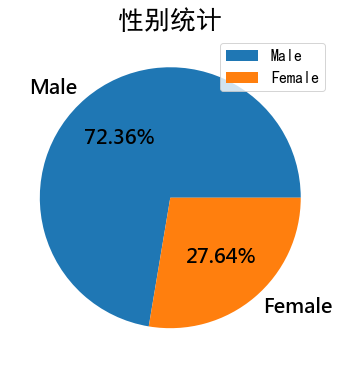

In [97]:
# 获得调查的所有数据
df = analysis.df
# print('调查总人数{}'.format(df.shape[0]))

# 获得男性数据 女性数据
male = analysis.male
female = analysis.female

# print('男性总人数{},占总人数{}%'.format(male.shape[0],male.shape[0]*100/df.shape[0]))
# print('女性总人数{},占总人数{}%'.format(female.shape[0],female.shape[0]*100/df.shape[0]))

table = PrettyTable(['性别','人数','占比'])
table.add_row(['男性','{}'.format(male.shape[0]),'{}%'.format(round(male.shape[0]*100/df.shape[0],2))])
table.add_row(['女性','{}'.format(female.shape[0]),'{}%'.format(round(female.shape[0]*100/df.shape[0],2))])
table.add_row(['','{}'.format(df.shape[0]),'100%'])
print(table)
# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [male.shape[0]*100/df.shape[0],female.shape[0]*100/df.shape[0]]
name_list = ['Male','Female']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('性别统计',fontsize=26,fontweight='bold')
plt.legend(fontsize=16)
#plt.savefig('性别统计.png')
plt.show()

+--------------+------+--------------+
|     类别     | 人数 | 总人数中占比 |
+--------------+------+--------------+
|  潮鞋爱好者  |  46  |    23.12%    |
| 非潮鞋爱好者 | 153  |    76.88%    |
|              | 199  |     100%     |
+--------------+------+--------------+


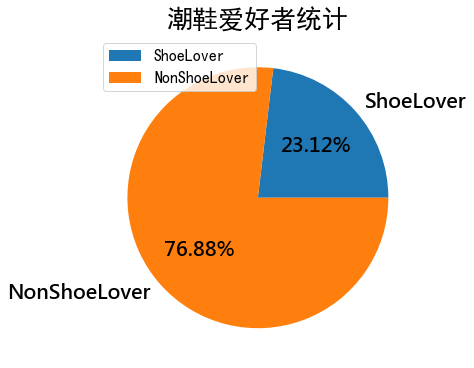

In [98]:
# 获得潮鞋爱好者和非潮鞋爱好者的数据
shoelover = analysis.shoelover
#print('潮鞋爱好者人数{},在总人数中占比{}%'.format(shoelover.shape[0],shoelover.shape[0]*100/df.shape[0]))
not_shoelover = analysis.not_shoelover
#print('非潮鞋爱好者人数{},在总人数中占比{}%'.format(not_shoelover.shape[0],not_shoelover.shape[0]*100/df.shape[0]))

table = PrettyTable(['类别','人数','总人数中占比'])
table.add_row(['潮鞋爱好者','{}'.format(shoelover.shape[0]),'{}%'.format(round(shoelover.shape[0]*100/df.shape[0],2))])
table.add_row(['非潮鞋爱好者','{}'.format(not_shoelover.shape[0]),'{}%'.format(round(not_shoelover.shape[0]*100/df.shape[0],2))])
table.add_row(['','{}'.format(df.shape[0]),'100%'])
print(table)
# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [shoelover.shape[0]*100/df.shape[0],not_shoelover.shape[0]*100/df.shape[0]]
name_list = ['ShoeLover','NonShoeLover']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('潮鞋爱好者统计',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=2)
#plt.savefig('潮鞋爱好者统计.png')
plt.show()

In [99]:
# 获得男性潮鞋爱好者数据 女性潮鞋爱好者数据
male_shoelover = male[male['IfShoeLover']==1]
#print('男性总人数{},其中潮鞋爱好者人数{},在男性中占比{}%'.format(male.shape[0],male_shoelover.shape[0],100*male_shoelover.shape[0]/male.shape[0]))
female_shoelover = female[female['IfShoeLover']==1]
#print('女性总人数{},其中潮鞋爱好者人数{},在女性中占比{}%'.format(female.shape[0],female_shoelover.shape[0],100*female_shoelover.shape[0]/female.shape[0]))

table = PrettyTable(['性别','总人数','潮鞋爱好者人数','占比'])
table.add_row(['男性','{}'.format(male.shape[0]),'{}'.format(male_shoelover.shape[0]),'{}%'.format(round(100*male_shoelover.shape[0]/male.shape[0]),2)])
table.add_row(['女性','{}'.format(female.shape[0]),'{}'.format(female_shoelover.shape[0]),'{}%'.format(round(100*female_shoelover.shape[0]/female.shape[0],2))])
print(table)

# 推断统计——卡方分析 性别与潮鞋爱好者是否有关
male_nonshoelover = male[male['IfShoeLover']==2]
female_nonshoelover = female[female['IfShoeLover']==2]
alpha = 0.025 
chi_value_criteria = 5.024 # 置信度为0.0975自由度为1时查表
chi_data = [
    [male_shoelover.shape[0],male_nonshoelover.shape[0]],
    [female_shoelover.shape[0],female_nonshoelover.shape[0]]
]
## 列联表
table = PrettyTable(['','潮鞋爱好者人数','非潮鞋爱好者人数'])
table.add_row(['男性','{}'.format(male_shoelover.shape[0]),'{}'.format(male_nonshoelover.shape[0])])
table.add_row(['女性','{}'.format(female_shoelover.shape[0]),'{}'.format(female_nonshoelover.shape[0])])
print(table)
## 进行卡方分析
chi_data = np.array(chi_data)
chi_value,p_value,freedom_deg,_ = scipy.stats.chi2_contingency(chi_data)
table = PrettyTable(['卡方值','p值','自由度'])
table.add_row(['{}'.format(round(chi_value,2)),'{}'.format(round(p_value,2)),'{}'.format(freedom_deg)])
print(table)
if chi_value < chi_value_criteria:
    print('性别与潮鞋爱好者没有显著的相关性')
else:
    print('性别与潮鞋爱好者有显著的相关性')

+------+--------+----------------+--------+
| 性别 | 总人数 | 潮鞋爱好者人数 |  占比  |
+------+--------+----------------+--------+
| 男性 |  144   |       38       |  26%   |
| 女性 |   55   |       8        | 14.55% |
+------+--------+----------------+--------+
+------+----------------+------------------+
|      | 潮鞋爱好者人数 | 非潮鞋爱好者人数 |
+------+----------------+------------------+
| 男性 |       38       |       106        |
| 女性 |       8        |        47        |
+------+----------------+------------------+
+--------+------+--------+
| 卡方值 | p值  | 自由度 |
+--------+------+--------+
|  2.51  | 0.11 |   1    |
+--------+------+--------+
性别与潮鞋爱好者没有显著的相关性


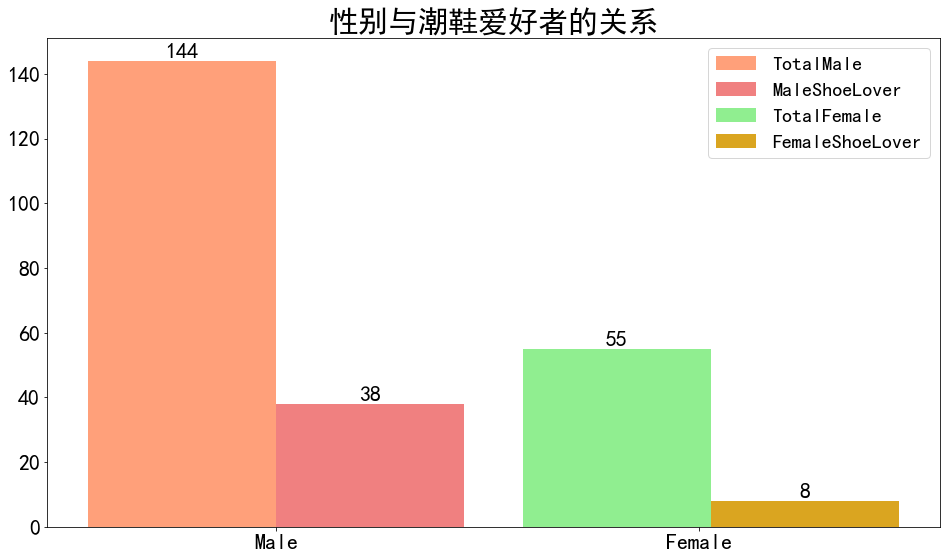

In [100]:
# 描述性统计——统计图 柱状图
fig = plt.figure(figsize=(16,9))
x=0
bar_width = 0.8
bar_gap = 0.25

plt.bar(x,male.shape[0],color='lightsalmon',label='TotalMale')
plt.text(x,male.shape[0], s='{}'.format(male.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,male_shoelover.shape[0],color='lightcoral',label='MaleShoeLover')
plt.text(x,male_shoelover.shape[0], s='{}'.format(male_shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,female.shape[0],color='lightgreen',label='TotalFemale')
plt.text(x,female.shape[0], s='{}'.format(female.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,female_shoelover.shape[0],color='goldenrod',label='FemaleShoeLover')
plt.text(x,female_shoelover.shape[0], s='{}'.format(female_shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')

plt.xticks(
    ticks=[0+bar_width/2,1+bar_width*1.5],
    labels=['Male','Female'],
    fontsize=22,
    fontweight='bold'
)
plt.yticks(fontsize=22,fontweight='bold')
plt.legend(fontsize=20)
plt.title('性别与潮鞋爱好者的关系',fontsize=30,fontweight='bold')
#plt.savefig('性别与潮鞋爱好者的关系.png')
plt.show()

潮鞋爱好者在男性中的比例是女性中的两倍

In [101]:
# 分析(非)潮鞋爱好者支持洗鞋服务的情况
support = df[df['IfAcceptService']==1]
non_support = df[df['IfAcceptService']==2]
#print('支持洗鞋服务人数{},在总人数中占比{}%'.format(support.shape[0],support.shape[0]*100/df.shape[0]))
shoelover_support = shoelover[shoelover['IfAcceptService']==1]
#print('潮鞋爱好者支持洗鞋服务的人数为{},在潮鞋爱好者中占比{}%'.format(shoelover_support.shape[0],shoelover_support.shape[0]*100/shoelover.shape[0]))
not_shoelover_support = not_shoelover[not_shoelover['IfAcceptService']==1]
#print('非潮鞋爱好者支持洗鞋服务的人数为{},在非潮鞋爱好者中占比{}%'.format(not_shoelover_support.shape[0],not_shoelover_support.shape[0]*100/not_shoelover.shape[0]))
table = PrettyTable(['类别','支持洗鞋服务的人数','在其类别中占比'])
table.add_row(['全体调查者','{}'.format(support.shape[0]),'{}%'.format(round(support.shape[0]*100/df.shape[0],2))])
table.add_row(['潮鞋爱好者','{}'.format(shoelover_support.shape[0]),'{}%'.format(round(shoelover_support.shape[0]*100/shoelover.shape[0],2))])
table.add_row(['非潮鞋爱好者','{}'.format(not_shoelover_support.shape[0]),'{}%'.format(round(not_shoelover_support.shape[0]*100/not_shoelover.shape[0],2))])
print(table)

# 推断统计——卡方分析 潮鞋爱好者与支持洗鞋服务是否有关
shoelover_nonsupport = shoelover[shoelover['IfAcceptService']==2]
not_shoelover_nonsupport = not_shoelover[not_shoelover['IfAcceptService']==2]
alpha = 0.025 
chi_value_criteria = 5.024 # 置信度为0.0975自由度为1时查表
chi_data = [
    [shoelover_support.shape[0],shoelover_nonsupport.shape[0]],
    [not_shoelover_support.shape[0],not_shoelover_nonsupport.shape[0]]
]
## 列联表
table = PrettyTable(['','支持洗鞋服务人数','不支持洗鞋服务人数'])
table.add_row(['潮鞋爱好者','{}'.format(shoelover_support.shape[0]),'{}'.format(shoelover_nonsupport.shape[0])])
table.add_row(['非潮鞋爱好者','{}'.format(not_shoelover_support.shape[0]),'{}'.format(not_shoelover_nonsupport.shape[0])])
print(table)
## 进行卡方分析
chi_data = np.array(chi_data)
chi_value,p_value,freedom_deg,_ = scipy.stats.chi2_contingency(chi_data)
table = PrettyTable(['卡方值','p值','自由度'])
table.add_row(['{}'.format(round(chi_value,2)),'{}'.format(round(p_value,2)),'{}'.format(freedom_deg)])
print(table)
if chi_value < chi_value_criteria:
    print('潮鞋爱好者与支持洗鞋服务没有显著的相关性')
else:
    print('潮鞋爱好者与支持洗鞋服务有显著的相关性')

+--------------+--------------------+----------------+
|     类别     | 支持洗鞋服务的人数 | 在其类别中占比 |
+--------------+--------------------+----------------+
|  全体调查者  |        116         |     58.29%     |
|  潮鞋爱好者  |         39         |     84.78%     |
| 非潮鞋爱好者 |         77         |     50.33%     |
+--------------+--------------------+----------------+
+--------------+------------------+--------------------+
|              | 支持洗鞋服务人数 | 不支持洗鞋服务人数 |
+--------------+------------------+--------------------+
|  潮鞋爱好者  |        39        |         7          |
| 非潮鞋爱好者 |        77        |         76         |
+--------------+------------------+--------------------+
+--------+-----+--------+
| 卡方值 | p值 | 自由度 |
+--------+-----+--------+
| 15.88  | 0.0 |   1    |
+--------+-----+--------+
潮鞋爱好者与支持洗鞋服务有显著的相关性


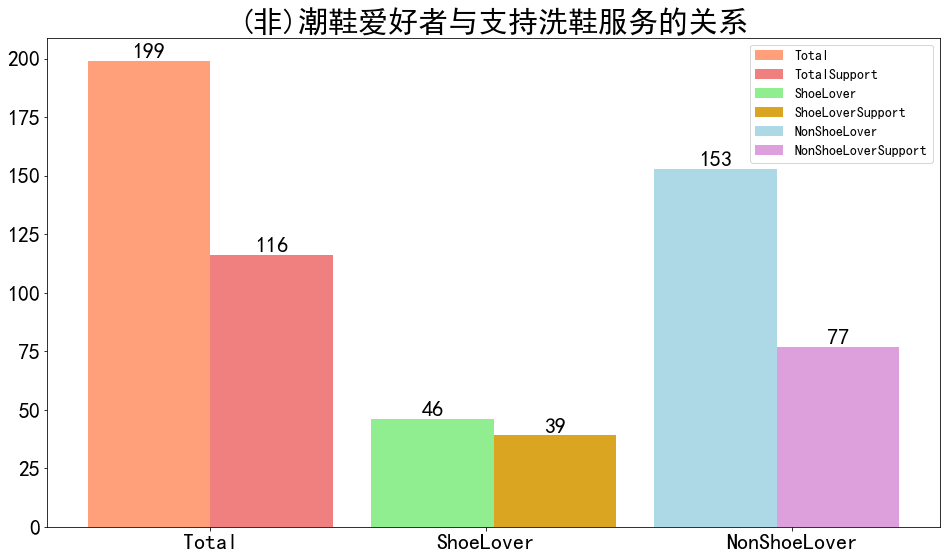

In [102]:
# 描述性统计——统计图 柱状图
fig = plt.figure(figsize=(16,9))
x=0
bar_width = 0.8
bar_gap = 0.25

plt.bar(x,df.shape[0],color='lightsalmon',label='Total')
plt.text(x,df.shape[0], s='{}'.format(df.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,support.shape[0],color='lightcoral',label='TotalSupport')
plt.text(x,support.shape[0], s='{}'.format(support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,shoelover.shape[0],color='lightgreen',label='ShoeLover')
plt.text(x,shoelover.shape[0], s='{}'.format(shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,shoelover_support.shape[0],color='goldenrod',label='ShoeLoverSupport')
plt.text(x,shoelover_support.shape[0], s='{}'.format(shoelover_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,not_shoelover.shape[0],color='lightblue',label='NonShoeLover')
plt.text(x,not_shoelover.shape[0], s='{}'.format(not_shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,not_shoelover_support.shape[0],color='plum',label='NonShoeLoverSupport')
plt.text(x,not_shoelover_support.shape[0], s='{}'.format(not_shoelover_support.shape[0]),ha='center', va='bottom',fontsize=22,fontweight='bold')

plt.xticks(
    ticks=[0+bar_width/2,1+bar_width*1.5,1+bar_width*4],
    labels=['Total','ShoeLover','NonShoeLover'],
    fontsize=22,
    fontweight='bold'
)
plt.yticks(fontsize=22,fontweight='bold')
plt.legend(fontsize=14)
plt.title('(非)潮鞋爱好者与支持洗鞋服务的关系',fontsize=30,fontweight='bold')
#plt.savefig('(非)潮鞋爱好者与支持洗鞋服务的关系.png')
plt.show()

1. 支持洗鞋服务的人共有60%
2. 在潮鞋爱好者中占84.8%(潮鞋爱好者占总人数23.1%)
3. 在非潮鞋爱好者中占50%(非潮鞋爱好者占总人数76.9%)

In [103]:
# 获得男性女性支持洗鞋服务的情况
male_support = male[male['IfAcceptService']==1]
#print('男性中支持洗鞋服务人数为{},在男性中占比为{}%'.format(male_support.shape[0],male_support.shape[0]*100/male.shape[0]))
female_support = female[female['IfAcceptService']==1] 
#print('女性中支持洗鞋服务人数为{},在女性中占比为{}%'.format(female_support.shape[0],female_support.shape[0]*100/female.shape[0]))
table = PrettyTable(['性别','支持洗鞋服务','在该性别中占比'])
table.add_row(['男性','{}'.format(male_support.shape[0]),'{}%'.format(round(male_support.shape[0]*100/male.shape[0],2))])
table.add_row(['女性','{}'.format(female_support.shape[0]),'{}%'.format(round(female_support.shape[0]*100/female.shape[0],2))])
print(table)
# 推断统计——卡方分析 性别与支持洗鞋服务是否有关
male_nonsupport = male[male['IfAcceptService']==2]
female_nonsupport = female[female['IfAcceptService']==2] 
alpha = 0.025 
chi_value_criteria = 5.024 # 置信度为0.0975自由度为1时查表
chi_data = [
    [male_support.shape[0],male_nonsupport.shape[0]],
    [female_support.shape[0],female_nonsupport.shape[0]]
]
## 列联表
table = PrettyTable(['','支持洗鞋服务人数','不支持洗鞋服务人数'])
table.add_row(['男性','{}'.format(male_support.shape[0]),'{}'.format(male_nonsupport.shape[0])])
table.add_row(['女性','{}'.format(female_support.shape[0]),'{}'.format(female_nonsupport.shape[0])])
print(table)
## 进行卡方分析
chi_data = np.array(chi_data)
chi_value,p_value,freedom_deg,_ = scipy.stats.chi2_contingency(chi_data)
table = PrettyTable(['卡方值','p值','自由度'])
table.add_row(['{}'.format(round(chi_value,2)),'{}'.format(round(p_value,2)),'{}'.format(freedom_deg)])
print(table)
if chi_value < chi_value_criteria:
    print('性别与支持洗鞋服务没有显著的相关性')
else:
    print('性别与支持洗鞋服务有显著的相关性')

+------+--------------+----------------+
| 性别 | 支持洗鞋服务 | 在该性别中占比 |
+------+--------------+----------------+
| 男性 |      90      |     62.5%      |
| 女性 |      26      |     47.27%     |
+------+--------------+----------------+
+------+------------------+--------------------+
|      | 支持洗鞋服务人数 | 不支持洗鞋服务人数 |
+------+------------------+--------------------+
| 男性 |        90        |         54         |
| 女性 |        26        |         29         |
+------+------------------+--------------------+
+--------+------+--------+
| 卡方值 | p值  | 自由度 |
+--------+------+--------+
|  3.2   | 0.07 |   1    |
+--------+------+--------+
性别与支持洗鞋服务没有显著的相关性


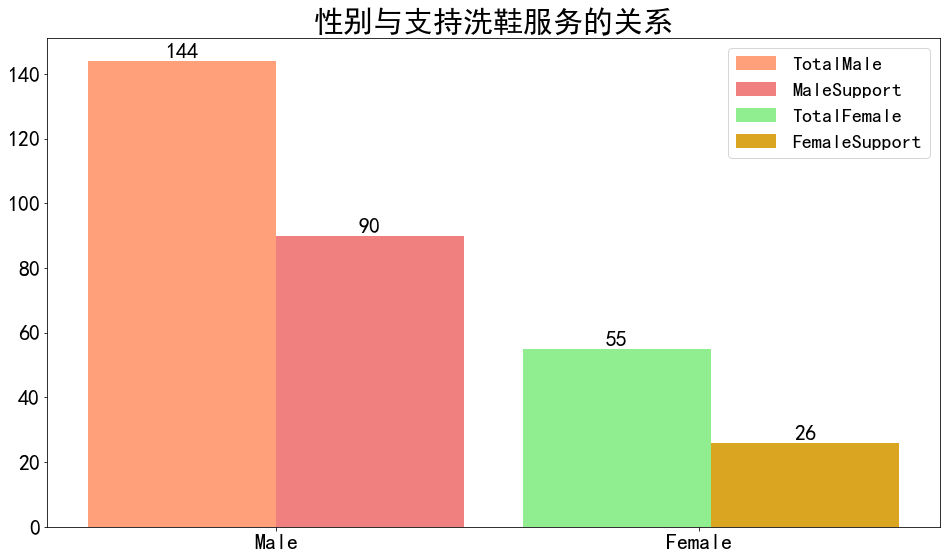

In [104]:
# 描述性统计——统计图  柱状图
fig = plt.figure(figsize=(16,9))
x=0
bar_width = 0.8
bar_gap = 0.25

plt.bar(x,male.shape[0],color='lightsalmon',label='TotalMale')
plt.text(x,male.shape[0], s='{}'.format(male.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,male_support.shape[0],color='lightcoral',label='MaleSupport')
plt.text(x,male_support.shape[0], s='{}'.format(male_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,female.shape[0],color='lightgreen',label='TotalFemale')
plt.text(x,female.shape[0], s='{}'.format(female.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,female_support.shape[0],color='goldenrod',label='FemaleSupport')
plt.text(x,female_support.shape[0], s='{}'.format(female_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')

plt.xticks(
    ticks=[0+bar_width/2,1+bar_width*1.5],
    labels=['Male','Female'],
    fontsize=22,
    fontweight='bold'
)
plt.yticks(fontsize=22,fontweight='bold')
plt.legend(fontsize=20)
plt.title('性别与支持洗鞋服务的关系',fontsize=30,fontweight='bold')
#plt.savefig('性别与支持洗鞋服务的关系.png')
plt.show()

支持洗鞋服务的比例男性比女性超出15个百分点

In [105]:
# 潮鞋爱好者 与 洗鞋子 支持洗鞋服务的相关性
shoelover_wash = shoelover[shoelover['IfWashByOneself']==1] # 潮鞋爱好者中自己洗鞋子的人的数据
#print('潮鞋爱好者中自己洗鞋子的人数{},在潮鞋爱好者中占比{}%'.format(shoelover_wash.shape[0],shoelover_wash.shape[0]*100/shoelover.shape[0]))
shoelover_nowash = shoelover[shoelover['IfWashByOneself']==2] # 潮鞋爱好者中自己不洗鞋子的人的数据
#print('潮鞋爱好者中自己不洗鞋子的人数{},在潮鞋爱好者中占比{}%'.format(shoelover_nowash.shape[0],shoelover_nowash.shape[0]*100/shoelover.shape[0]))

shoelover_wash_support = shoelover_wash[shoelover_wash['IfAcceptService']==1] # 潮鞋爱好者中自己洗鞋子且支持洗鞋服务的数据
#print('潮鞋爱好者中自己洗鞋子的人中支持洗鞋服务的人数为{},占比{}%'.format(shoelover_wash_support.shape[0],shoelover_wash_support.shape[0]*100/shoelover_wash.shape[0]))
shoelover_nowash_support = shoelover_nowash[shoelover_nowash['IfAcceptService']==1] # 潮鞋爱好者中自己不洗鞋子且支持洗鞋的数据
#print('潮鞋爱好者中自己不洗鞋子的人中支持洗鞋服务的人数为{},占比{}%'.format(shoelover_nowash_support.shape[0],shoelover_nowash_support.shape[0]*100/shoelover_nowash.shape[0]))

table = PrettyTable(['类别','类别人数','在潮鞋爱好者中占比','支持洗鞋服务人数','在该类别中占比'])
table.add_row(['自己洗鞋的潮鞋爱好者','{}'.format(shoelover_wash.shape[0]),'{}%'.format(round(shoelover_wash.shape[0]*100/shoelover.shape[0],2)),'{}'.format(shoelover_wash_support.shape[0]),'{}%'.format(round(shoelover_wash_support.shape[0]*100/shoelover_wash.shape[0],2))])
table.add_row(['自己不洗鞋的潮鞋爱好者','{}'.format(shoelover_nowash.shape[0]),'{}%'.format(round(shoelover_nowash.shape[0]*100/shoelover.shape[0],2)),'{}'.format(shoelover_nowash_support.shape[0]),'{}%'.format(round(shoelover_nowash_support.shape[0]*100/shoelover_nowash.shape[0],2))])
print(table)

+------------------------+----------+--------------------+------------------+----------------+
|          类别          | 类别人数 | 在潮鞋爱好者中占比 | 支持洗鞋服务人数 | 在该类别中占比 |
+------------------------+----------+--------------------+------------------+----------------+
|  自己洗鞋的潮鞋爱好者  |    34    |       73.91%       |        27        |     79.41%     |
| 自己不洗鞋的潮鞋爱好者 |    12    |       26.09%       |        12        |     100.0%     |
+------------------------+----------+--------------------+------------------+----------------+


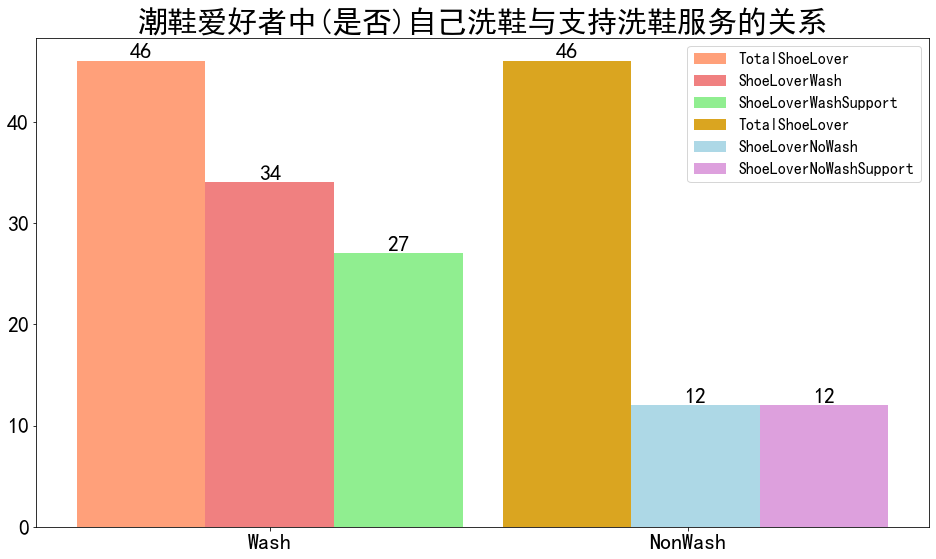

In [106]:
# 描述性统计——统计图 柱状图
fig = plt.figure(figsize=(16,9))
x = 0
bar_width = 0.8
bar_gap = 0.25

plt.bar(x,shoelover.shape[0],color='lightsalmon',label='TotalShoeLover')
plt.text(x,shoelover.shape[0], s='{}'.format(shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,shoelover_wash.shape[0],color='lightcoral',label='ShoeLoverWash')
plt.text(x,shoelover_wash.shape[0], s='{}'.format(shoelover_wash.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,shoelover_wash_support.shape[0],color='lightgreen',label='ShoeLoverWashSupport')
plt.text(x,shoelover_wash_support.shape[0], s='{}'.format(shoelover_wash_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,shoelover.shape[0],color='goldenrod',label='TotalShoeLover')
plt.text(x,shoelover.shape[0], s='{}'.format(shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,shoelover_nowash.shape[0],color='lightblue',label='ShoeLoverNoWash')
plt.text(x,shoelover_nowash.shape[0], s='{}'.format(shoelover_nowash.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,shoelover_nowash_support.shape[0],color='plum',label='ShoeLoverNoWashSupport')
plt.text(x,shoelover_nowash_support.shape[0], s='{}'.format(shoelover_nowash_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')

plt.xticks(
    ticks=[0+bar_width,1+bar_width*3],
    labels=['Wash','NonWash'],
    fontsize=22,
    fontweight='bold'
)
plt.yticks(fontsize=22,fontweight='bold')
plt.legend(fontsize=16)
plt.title('潮鞋爱好者中(是否)自己洗鞋与支持洗鞋服务的关系',fontsize=30,fontweight='bold')
#plt.savefig('潮鞋爱好者中(是否)自己洗鞋与支持洗鞋服务的关系.png')
plt.show()

1. 潮鞋爱好者自己洗鞋子的人 有80%支持洗鞋服务
2. 潮鞋爱好者不自己洗鞋子的人 有100%支持洗鞋服务
3. 可以认为无论自己洗不洗鞋 潮鞋爱好者都支持洗鞋服务

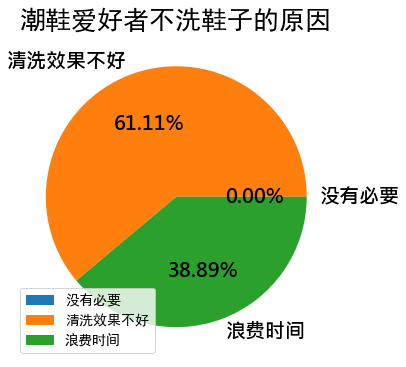

In [107]:
# 潮鞋爱好者为什么不自己洗鞋子 NoNecessity BadEffect WasteTime
shoelover_nowash_rea_1 = shoelover_nowash[shoelover_nowash['NoNecessity']==1]
shoelover_nowash_rea_2 = shoelover_nowash[shoelover_nowash['BadEffect']==1]
shoelover_nowash_rea_3 = shoelover_nowash[shoelover_nowash['WasteTime']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    shoelover_nowash_rea_1.shape[0]*100/shoelover_nowash.shape[0],
    shoelover_nowash_rea_2.shape[0]*100/shoelover_nowash.shape[0],
    shoelover_nowash_rea_3.shape[0]*100/shoelover_nowash.shape[0]
]
name_list = ['没有必要','清洗效果不好','浪费时间']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('潮鞋爱好者不洗鞋子的原因',fontsize=26,fontweight='bold')
plt.legend(fontsize=14,loc=3)
#plt.savefig('潮鞋爱好者不洗鞋子的原因.png')
plt.show()

不洗鞋子的潮鞋爱好者100%支持洗鞋服务

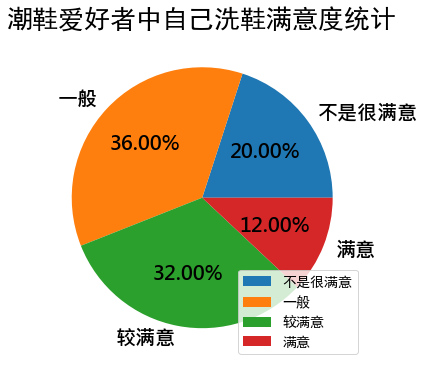

In [108]:
# 潮鞋爱好者中自己洗鞋的人的满意度
shoelover_wash_sat_1 = shoelover_wash[shoelover_wash['Satisfaction']==1] # 不是很满意
shoelover_wash_sat_2 = shoelover_wash[shoelover_wash['Satisfaction']==2] # 一般
shoelover_wash_sat_3 = shoelover_wash[shoelover_wash['Satisfaction']==3] # 较满意
shoelover_wash_sat_4 = shoelover_wash[shoelover_wash['Satisfaction']==4] # 满意

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    shoelover_wash_sat_1.shape[0]*100/shoelover_wash.shape[0],
    shoelover_wash_sat_2.shape[0]*100/shoelover_wash.shape[0],
    shoelover_wash_sat_3.shape[0]*100/shoelover_wash.shape[0],
    shoelover_wash_sat_4.shape[0]*100/shoelover_wash.shape[0]
]
name_list = ['不是很满意','一般','较满意','满意']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('潮鞋爱好者中自己洗鞋满意度统计',fontsize=26,fontweight='bold')
plt.legend(fontsize=14,loc=4)
#plt.savefig('潮鞋爱好者中自己洗鞋满意度统计.png')
plt.show()

In [109]:
# 潮鞋爱好者中自己洗鞋 不同满意度的支持洗鞋服务情况
shoelover_wash_sat_1_support = shoelover_wash_sat_1[shoelover_wash_sat_1['IfAcceptService']==1] # 不是很满意
shoelover_wash_sat_2_support = shoelover_wash_sat_2[shoelover_wash_sat_2['IfAcceptService']==1] # 一般
shoelover_wash_sat_3_support = shoelover_wash_sat_3[shoelover_wash_sat_3['IfAcceptService']==1] # 较满意
shoelover_wash_sat_4_support = shoelover_wash_sat_4[shoelover_wash_sat_4['IfAcceptService']==1] # 满意

# print('潮鞋爱好者中自己洗鞋不是很满意的人中有{}%人支持洗鞋服务'.format(shoelover_wash_sat_1_support.shape[0]*100/shoelover_wash_sat_1.shape[0]))
# print('潮鞋爱好者中自己洗鞋一般的人中有{}%人支持洗鞋服务'.format(shoelover_wash_sat_2_support.shape[0]*100/shoelover_wash_sat_2.shape[0]))
# print('潮鞋爱好者中自己洗鞋较满意的人中有{}%人支持洗鞋服务'.format(shoelover_wash_sat_3_support.shape[0]*100/shoelover_wash_sat_3.shape[0]))
# print('潮鞋爱好者中自己洗鞋满意中有{}%人支持洗鞋服务'.format(shoelover_wash_sat_4_support.shape[0]*100/shoelover_wash_sat_4.shape[0]))

table = PrettyTable(['满意度','总人数','支持洗鞋服务','在类别中占比'])
table.add_row(['不是很满意','{}'.format(shoelover_wash_sat_1.shape[0]),'{}'.format(shoelover_wash_sat_1_support.shape[0]),'{}%'.format(round(shoelover_wash_sat_1_support.shape[0]*100/shoelover_wash_sat_1.shape[0],2))])
table.add_row(['一般','{}'.format(shoelover_wash_sat_2.shape[0]),'{}'.format(shoelover_wash_sat_2_support.shape[0]),'{}%'.format(round(shoelover_wash_sat_2_support.shape[0]*100/shoelover_wash_sat_2.shape[0],2))])
table.add_row(['较满意','{}'.format(shoelover_wash_sat_3.shape[0]),'{}'.format(shoelover_wash_sat_3_support.shape[0]),'{}%'.format(round(shoelover_wash_sat_3_support.shape[0]*100/shoelover_wash_sat_3.shape[0],2))])
table.add_row(['满意','{}'.format(shoelover_wash_sat_4.shape[0]),'{}'.format(shoelover_wash_sat_4_support.shape[0]),'{}%'.format(round(shoelover_wash_sat_4_support.shape[0]*100/shoelover_wash_sat_4.shape[0],2))])
print(table)

+------------+--------+--------------+--------------+
|   满意度   | 总人数 | 支持洗鞋服务 | 在类别中占比 |
+------------+--------+--------------+--------------+
| 不是很满意 |   5    |      5       |    100.0%    |
|    一般    |   9    |      9       |    100.0%    |
|   较满意   |   8    |      6       |    75.0%     |
|    满意    |   3    |      1       |    33.33%    |
+------------+--------+--------------+--------------+


In [110]:
# 非潮鞋爱好者 与 洗鞋子 支持洗鞋服务的相关性
not_shoelover_wash = not_shoelover[not_shoelover['IfWashByOneself']==1] # 非潮鞋爱好者中自己洗鞋子的人的数据
#print('非潮鞋爱好者中自己洗鞋子的人数{},在非潮鞋爱好者中占比{}%'.format(not_shoelover_wash.shape[0],not_shoelover_wash.shape[0]*100/not_shoelover.shape[0]))
not_shoelover_nowash = not_shoelover[not_shoelover['IfWashByOneself']==2] # 非潮鞋爱好者中自己不洗鞋子的人的数据
#print('非潮鞋爱好者中自己不洗鞋子的人数{},在非潮鞋爱好者中占比{}%'.format(not_shoelover_nowash.shape[0],not_shoelover_nowash.shape[0]*100/not_shoelover.shape[0]))

not_shoelover_wash_support = not_shoelover_wash[not_shoelover_wash['IfAcceptService']==1] # 非潮鞋爱好者中自己洗鞋子且支持洗鞋服务的数据
#print('非潮鞋爱好者中自己洗鞋子的人中支持洗鞋服务的人数为{},占比{}%'.format(not_shoelover_wash_support.shape[0],not_shoelover_wash_support.shape[0]*100/not_shoelover_wash.shape[0]))
not_shoelover_nowash_support = not_shoelover_nowash[not_shoelover_nowash['IfAcceptService']==1] # 非潮鞋爱好者中自己不洗鞋子且支持洗鞋服务的数据
#print('非潮鞋爱好者中自己不洗鞋子的人中支持洗鞋服务的人数为{},占比{}%'.format(not_shoelover_nowash_support.shape[0],not_shoelover_nowash_support.shape[0]*100/not_shoelover_nowash.shape[0]))

table = PrettyTable(['类别','类别人数','在非潮鞋爱好者中占比','支持洗鞋服务人数','在该类别中占比'])
table.add_row(['自己洗鞋的非潮鞋爱好者','{}'.format(not_shoelover_wash.shape[0]),'{}%'.format(round(not_shoelover_wash.shape[0]*100/not_shoelover.shape[0],2)),'{}'.format(not_shoelover_wash_support.shape[0]),'{}%'.format(round(not_shoelover_wash_support.shape[0]*100/not_shoelover_wash.shape[0],2))])
table.add_row(['自己不洗鞋的非潮鞋爱好者','{}'.format(not_shoelover_nowash.shape[0]),'{}%'.format(round(not_shoelover_nowash.shape[0]*100/not_shoelover.shape[0],2)),'{}'.format(not_shoelover_nowash_support.shape[0]),'{}%'.format(round(not_shoelover_nowash_support.shape[0]*100/not_shoelover_nowash.shape[0],2))])
print(table)

+--------------------------+----------+----------------------+------------------+----------------+
|           类别           | 类别人数 | 在非潮鞋爱好者中占比 | 支持洗鞋服务人数 | 在该类别中占比 |
+--------------------------+----------+----------------------+------------------+----------------+
|  自己洗鞋的非潮鞋爱好者  |   121    |        79.08%        |        54        |     44.63%     |
| 自己不洗鞋的非潮鞋爱好者 |    32    |        20.92%        |        23        |     71.88%     |
+--------------------------+----------+----------------------+------------------+----------------+


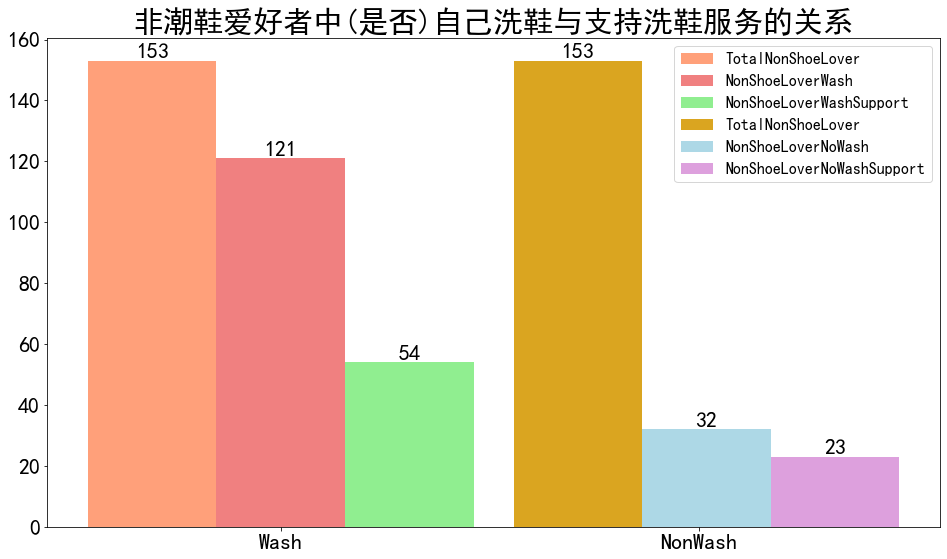

In [111]:
# 描述性统计——统计图 柱状图
fig = plt.figure(figsize=(16,9))
x = 0
bar_width = 0.8
bar_gap = 0.25

plt.bar(x,not_shoelover.shape[0],color='lightsalmon',label='TotalNonShoeLover')
plt.text(x,not_shoelover.shape[0], s='{}'.format(not_shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,not_shoelover_wash.shape[0],color='lightcoral',label='NonShoeLoverWash')
plt.text(x,not_shoelover_wash.shape[0], s='{}'.format(not_shoelover_wash.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,not_shoelover_wash_support.shape[0],color='lightgreen',label='NonShoeLoverWashSupport')
plt.text(x,not_shoelover_wash_support.shape[0], s='{}'.format(not_shoelover_wash_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width+bar_gap

plt.bar(x,not_shoelover.shape[0],color='goldenrod',label='TotalNonShoeLover')
plt.text(x,not_shoelover.shape[0], s='{}'.format(not_shoelover.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,not_shoelover_nowash.shape[0],color='lightblue',label='NonShoeLoverNoWash')
plt.text(x,not_shoelover_nowash.shape[0], s='{}'.format(not_shoelover_nowash.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')
x += bar_width
plt.bar(x,not_shoelover_nowash_support.shape[0],color='plum',label='NonShoeLoverNoWashSupport')
plt.text(x,not_shoelover_nowash_support.shape[0], s='{}'.format(not_shoelover_nowash_support.shape[0]),ha='center', va='bottom', fontsize=22,fontweight='bold')

plt.xticks(
    ticks=[0+bar_width,1+bar_width*3],
    labels=['Wash','NonWash'],
    fontsize=22,
    fontweight='bold'
)
plt.yticks(fontsize=22,fontweight='bold')
plt.legend(fontsize=16)
plt.title('非潮鞋爱好者中(是否)自己洗鞋与支持洗鞋服务的关系',fontsize=30,fontweight='bold')
#plt.savefig('非潮鞋爱好者中(是否)自己洗鞋与支持洗鞋服务的关系.png')
plt.show()

非潮鞋爱好者自己洗鞋子的人,有44%支持洗鞋服务
非潮鞋爱好者中自己不洗鞋子的人,有71%支持洗鞋服务

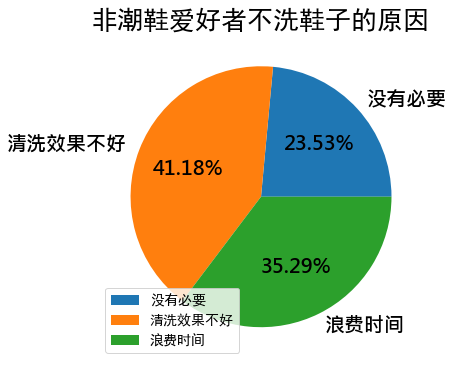

In [112]:
# 潮鞋爱好者为什么不自己洗鞋子 NoNecessity BadEffect WasteTime
nonshoelover_nowash_rea_1 = not_shoelover_nowash[not_shoelover_nowash['NoNecessity']==1]
nonshoelover_nowash_rea_2 = not_shoelover_nowash[not_shoelover_nowash['BadEffect']==1]
nonshoelover_nowash_rea_3 = not_shoelover_nowash[not_shoelover_nowash['WasteTime']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    nonshoelover_nowash_rea_1.shape[0]*100/not_shoelover_nowash.shape[0],
    nonshoelover_nowash_rea_2.shape[0]*100/not_shoelover_nowash.shape[0],
    nonshoelover_nowash_rea_3.shape[0]*100/not_shoelover_nowash.shape[0]
]
name_list = ['没有必要','清洗效果不好','浪费时间']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('非潮鞋爱好者不洗鞋子的原因',fontsize=26,fontweight='bold')
plt.legend(fontsize=14,loc=3)
#plt.savefig('非潮鞋爱好者不洗鞋子的原因.png')
plt.show()

In [113]:
# 每一类不洗鞋子的非潮鞋爱好者 支持洗鞋服务的情况
nonshoelover_nowash_rea_1_support = nonshoelover_nowash_rea_1[nonshoelover_nowash_rea_1['IfAcceptService']==1] # 没有必要
nonshoelover_nowash_rea_2_support = nonshoelover_nowash_rea_2[nonshoelover_nowash_rea_2['IfAcceptService']==1] # 清洗效果不好
nonshoelover_nowash_rea_3_support = nonshoelover_nowash_rea_3[nonshoelover_nowash_rea_3['IfAcceptService']==1] # 浪费时间

# print('认为没有必要的不洗鞋子的非潮鞋爱好者中有{}%支持洗鞋服务'.format(nonshoelover_nowash_rea_1_support.shape[0]*100/nonshoelover_nowash_rea_1.shape[0]))
# print('认为清洗效果不好的不洗鞋子的非潮鞋爱好者中有{}%支持洗鞋服务'.format(nonshoelover_nowash_rea_2_support.shape[0]*100/nonshoelover_nowash_rea_2.shape[0]))
# print('认为浪费时间的不洗鞋子的非潮鞋爱好者中有{}%支持洗鞋服务'.format(nonshoelover_nowash_rea_3_support.shape[0]*100/nonshoelover_nowash_rea_3.shape[0]))

table = PrettyTable(['原因','总人数','支持洗鞋服务','在该类原因中占比'])
table.add_row(['没有必要','{}'.format(nonshoelover_nowash_rea_1.shape[0]),'{}'.format(nonshoelover_nowash_rea_1_support.shape[0]),'{}%'.format(round(nonshoelover_nowash_rea_1_support.shape[0]*100/nonshoelover_nowash_rea_1.shape[0],2))])
table.add_row(['清洗效果不好','{}'.format(nonshoelover_nowash_rea_2.shape[0]),'{}'.format(nonshoelover_nowash_rea_2_support.shape[0]),'{}%'.format(round(nonshoelover_nowash_rea_2_support.shape[0]*100/nonshoelover_nowash_rea_2.shape[0],2))])
table.add_row(['浪费时间','{}'.format(nonshoelover_nowash_rea_3.shape[0]),'{}'.format(nonshoelover_nowash_rea_3_support.shape[0]),'{}%'.format(round(nonshoelover_nowash_rea_3_support.shape[0]*100/nonshoelover_nowash_rea_3.shape[0],2))])
print(table)

+--------------+--------+--------------+------------------+
|     原因     | 总人数 | 支持洗鞋服务 | 在该类原因中占比 |
+--------------+--------+--------------+------------------+
|   没有必要   |   12   |      8       |      66.67%      |
| 清洗效果不好 |   21   |      15      |      71.43%      |
|   浪费时间   |   18   |      14      |      77.78%      |
+--------------+--------+--------------+------------------+


In [114]:
# 推断统计——卡方分析 自己洗鞋子与潮鞋爱好者是否有关
alpha = 0.025 
chi_value_criteria = 5.024 # 置信度为0.0975自由度为1时查表
chi_data = [
    [shoelover_wash.shape[0],shoelover_nowash.shape[0]],
    [not_shoelover_wash.shape[0],not_shoelover_nowash.shape[0]]
]
## 列联表
table = PrettyTable(['','自己洗鞋子','不自己洗鞋子'])
table.add_row(['潮鞋爱好者','{}'.format(shoelover_wash.shape[0]),'{}'.format(shoelover_nowash.shape[0])])
table.add_row(['非潮鞋爱好者','{}'.format(not_shoelover_wash.shape[0]),'{}'.format(not_shoelover_nowash.shape[0])])
print(table)
## 进行卡方分析
chi_data = np.array(chi_data)
chi_value,p_value,freedom_deg,_ = scipy.stats.chi2_contingency(chi_data)
table = PrettyTable(['卡方值','p值','自由度'])
table.add_row(['{}'.format(round(chi_value,2)),'{}'.format(round(p_value,2)),'{}'.format(freedom_deg)])
print(table)
if chi_value < chi_value_criteria:
    print('自己洗鞋子与潮鞋爱好者没有显著的相关性')
else:
    print('自己洗鞋子与潮鞋爱好者有显著的相关性')

+--------------+------------+--------------+
|              | 自己洗鞋子 | 不自己洗鞋子 |
+--------------+------------+--------------+
|  潮鞋爱好者  |     34     |      12      |
| 非潮鞋爱好者 |    121     |      32      |
+--------------+------------+--------------+
+--------+------+--------+
| 卡方值 | p值  | 自由度 |
+--------+------+--------+
|  0.29  | 0.59 |   1    |
+--------+------+--------+
自己洗鞋子与潮鞋爱好者没有显著的相关性


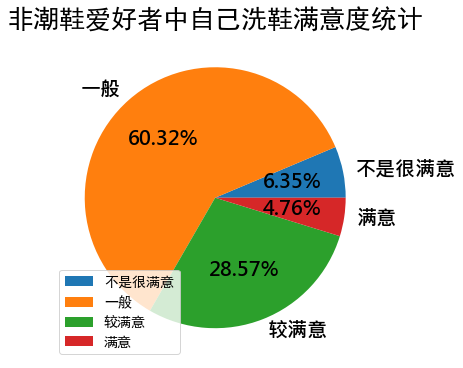

In [115]:
# 非潮鞋爱好者中自己洗鞋的人的满意度
nonshoelover_wash_sat_1 = not_shoelover_wash[not_shoelover_wash['Satisfaction']==1] # 不是很满意
nonshoelover_wash_sat_2 = not_shoelover_wash[not_shoelover_wash['Satisfaction']==2] # 一般
nonshoelover_wash_sat_3 = not_shoelover_wash[not_shoelover_wash['Satisfaction']==3] # 较满意
nonshoelover_wash_sat_4 = not_shoelover_wash[not_shoelover_wash['Satisfaction']==4] # 满意

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    nonshoelover_wash_sat_1.shape[0]*100/not_shoelover_wash.shape[0],
    nonshoelover_wash_sat_2.shape[0]*100/not_shoelover_wash.shape[0],
    nonshoelover_wash_sat_3.shape[0]*100/not_shoelover_wash.shape[0],
    nonshoelover_wash_sat_4.shape[0]*100/not_shoelover_wash.shape[0]
]
name_list = ['不是很满意','一般','较满意','满意']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('非潮鞋爱好者中自己洗鞋满意度统计',fontsize=26,fontweight='bold')
plt.legend(fontsize=14,loc=3)
#plt.savefig('非潮鞋爱好者中自己洗鞋满意度统计.png')
plt.show()

In [116]:
# 非潮鞋爱好者中自己洗鞋 不同满意度的支持洗鞋服务情况
nonshoelover_wash_sat_1_support = nonshoelover_wash_sat_1[nonshoelover_wash_sat_1['IfAcceptService']==1] # 不是很满意
nonshoelover_wash_sat_2_support = nonshoelover_wash_sat_2[nonshoelover_wash_sat_2['IfAcceptService']==1] # 一般
nonshoelover_wash_sat_3_support = nonshoelover_wash_sat_3[nonshoelover_wash_sat_3['IfAcceptService']==1] # 较满意
nonshoelover_wash_sat_4_support = nonshoelover_wash_sat_4[nonshoelover_wash_sat_4['IfAcceptService']==1] # 满意

# print('潮鞋爱好者中自己洗鞋不是很满意的人中有{}%人支持洗鞋服务'.format(nonshoelover_wash_sat_1_support.shape[0]*100/nonshoelover_wash_sat_1.shape[0]))
# print('潮鞋爱好者中自己洗鞋一般的人中有{}%人支持洗鞋服务'.format(nonshoelover_wash_sat_2_support.shape[0]*100/nonshoelover_wash_sat_2.shape[0]))
# print('潮鞋爱好者中自己洗鞋较满意的人中有{}%人支持洗鞋服务'.format(nonshoelover_wash_sat_3_support.shape[0]*100/nonshoelover_wash_sat_3.shape[0]))
# print('潮鞋爱好者中自己洗鞋满意中有{}%人支持洗鞋服务'.format(nonshoelover_wash_sat_4_support.shape[0]*100/nonshoelover_wash_sat_4.shape[0]))

table = PrettyTable(['满意度','总人数','支持洗鞋服务','在类别中占比'])
table.add_row(['不是很满意','{}'.format(nonshoelover_wash_sat_1.shape[0]),'{}'.format(nonshoelover_wash_sat_1_support.shape[0]),'{}%'.format(round(nonshoelover_wash_sat_1_support.shape[0]*100/nonshoelover_wash_sat_1.shape[0],2))])
table.add_row(['一般','{}'.format(nonshoelover_wash_sat_2.shape[0]),'{}'.format(nonshoelover_wash_sat_2_support.shape[0]),'{}%'.format(round(nonshoelover_wash_sat_2_support.shape[0]*100/nonshoelover_wash_sat_2.shape[0],2))])
table.add_row(['较满意','{}'.format(nonshoelover_wash_sat_3.shape[0]),'{}'.format(nonshoelover_wash_sat_3_support.shape[0]),'{}%'.format(round(nonshoelover_wash_sat_3_support.shape[0]*100/nonshoelover_wash_sat_3.shape[0],2))])
table.add_row(['满意','{}'.format(nonshoelover_wash_sat_4.shape[0]),'{}'.format(nonshoelover_wash_sat_4_support.shape[0]),'{}%'.format(round(nonshoelover_wash_sat_4_support.shape[0]*100/nonshoelover_wash_sat_4.shape[0],2))])
print(table)

+------------+--------+--------------+--------------+
|   满意度   | 总人数 | 支持洗鞋服务 | 在类别中占比 |
+------------+--------+--------------+--------------+
| 不是很满意 |   4    |      3       |    75.0%     |
|    一般    |   38   |      18      |    47.37%    |
|   较满意   |   18   |      6       |    33.33%    |
|    满意    |   3    |      1       |    33.33%    |
+------------+--------+--------------+--------------+


不支持洗鞋服务有83人
不支持洗鞋服务的潮鞋爱好者有7人
不支持洗鞋服务的非潮鞋爱好者有76人


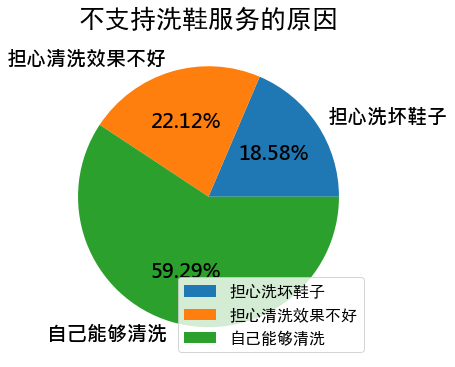

In [117]:
# 不支持洗鞋服务的调查者的原因
print('不支持洗鞋服务有{}人'.format(non_support.shape[0]))
non_support_shoelover = non_support[non_support['IfShoeLover']==1]
print('不支持洗鞋服务的潮鞋爱好者有{}人'.format(non_support_shoelover.shape[0]))
non_support_nonshoelover = non_support[non_support['IfShoeLover']==2]
print('不支持洗鞋服务的非潮鞋爱好者有{}人'.format(non_support_nonshoelover.shape[0]))
non_support_rea_1 = non_support[non_support['WorryServiceShoeDamage']==1]
non_support_rea_2 = non_support[non_support['WorryServiceEffect']==1]
non_support_rea_3 = non_support[non_support['CanWashOneself']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    non_support_rea_1.shape[0]*100/non_support.shape[0],
    non_support_rea_2.shape[0]*100/non_support.shape[0],
    non_support_rea_3.shape[0]*100/non_support.shape[0]
]
name_list = ['担心洗坏鞋子','担心清洗效果不好','自己能够清洗']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('不支持洗鞋服务的原因',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=4)
#plt.savefig('不支持洗鞋服务的原因.png')
plt.show()

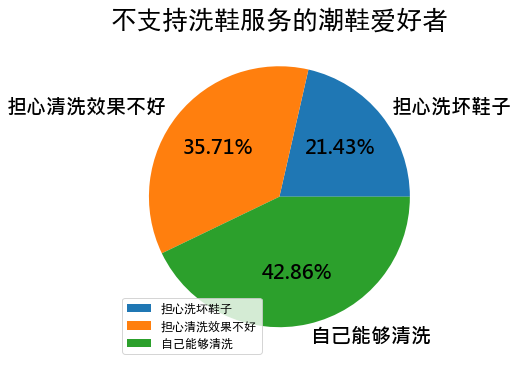

In [118]:
# 认为自己能够清洗的潮鞋爱好者比例
non_support_rea_1_shoelover = non_support_rea_1[non_support_rea_1['IfShoeLover']==1]
non_support_rea_2_shoelover = non_support_rea_2[non_support_rea_2['IfShoeLover']==1]
non_support_rea_3_shoelover = non_support_rea_3[non_support_rea_3['IfShoeLover']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    non_support_rea_1_shoelover.shape[0]*100/non_support_shoelover.shape[0],
    non_support_rea_2_shoelover.shape[0]*100/non_support_shoelover.shape[0],
    non_support_rea_3_shoelover.shape[0]*100/non_support_shoelover.shape[0]
]
name_list = ['担心洗坏鞋子','担心清洗效果不好','自己能够清洗']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('不支持洗鞋服务的潮鞋爱好者',fontsize=26,fontweight='bold')
plt.legend(fontsize=12,loc=3)
#plt.savefig('不支持洗鞋服务的潮鞋爱好者.png')
plt.show()

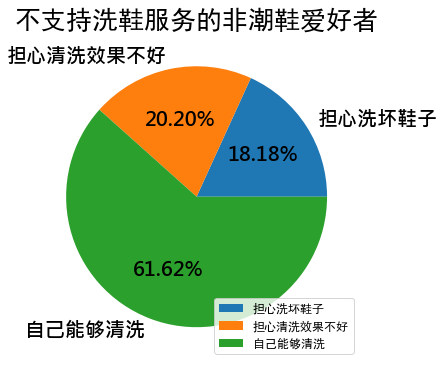

In [119]:
# 认为自己能够清洗的潮鞋爱好者比例
non_support_rea_1_nonshoelover = non_support_rea_1[non_support_rea_1['IfShoeLover']==2]
non_support_rea_2_nonshoelover = non_support_rea_2[non_support_rea_2['IfShoeLover']==2]
non_support_rea_3_nonshoelover = non_support_rea_3[non_support_rea_3['IfShoeLover']==2]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    non_support_rea_1_nonshoelover.shape[0]*100/non_support_nonshoelover.shape[0],
    non_support_rea_2_nonshoelover.shape[0]*100/non_support_nonshoelover.shape[0],
    non_support_rea_3_nonshoelover.shape[0]*100/non_support_nonshoelover.shape[0]
]
name_list = ['担心洗坏鞋子','担心清洗效果不好','自己能够清洗']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('不支持洗鞋服务的非潮鞋爱好者',fontsize=26,fontweight='bold')
plt.legend(fontsize=12,loc=4)
#plt.savefig('不支持洗鞋服务的非潮鞋爱好者.png')
plt.show()

In [120]:
shoelover_num_list = []
shoelover_list = []
nonshoelover_num_list = []
nonshoelover_list = []

# 确定(非)潮鞋爱好者具有不同价位鞋子的数量
for col_name in ['LessThan500','500To1000','1000To1500','NoLessThan1500']:
    for i in range(1,6):
        lover_num = shoelover[shoelover[col_name]==i].shape[0]
        non_lover_num = not_shoelover[not_shoelover[col_name]==i].shape[0]
        if i == 5:
            #print('鞋子价格区间为{},鞋子数量大于3,潮鞋爱好者中拥有该区间该数量鞋子的人数{},在潮鞋爱好者中占比为{}%'.format(col_name,lover_num,lover_num*100/shoelover.shape[0]))
            #print('鞋子价格区间为{},鞋子数量大于3,非潮鞋爱好者中拥有该区间该数量鞋子的人数{},在非潮鞋爱好者中占比为{}%'.format(col_name,non_lover_num,non_lover_num*100/not_shoelover.shape[0]))
            shoelover_list.append(lover_num/shoelover.shape[0])
            shoelover_num_list.append(lover_num)
            nonshoelover_list.append(non_lover_num/not_shoelover.shape[0])
            nonshoelover_num_list.append(non_lover_num)
            continue       
        #print('鞋子价格区间为{},鞋子数量为{},潮鞋爱好者中拥有该区间该数量鞋子的人数{},在潮鞋爱好者中占比为{}%'.format(col_name,i-1,lover_num,lover_num*100/shoelover.shape[0]))
        #print('鞋子价格区间为{},鞋子数量为{},非潮鞋爱好者中拥有该区间该数量鞋子的人数{},在非潮鞋爱好者中占比为{}%'.format(col_name,i-1,non_lover_num,non_lover_num*100/not_shoelover.shape[0]))
        shoelover_num_list.append(lover_num)
        shoelover_list.append(lover_num/shoelover.shape[0])
        nonshoelover_num_list.append(non_lover_num)
        nonshoelover_list.append(non_lover_num/not_shoelover.shape[0])

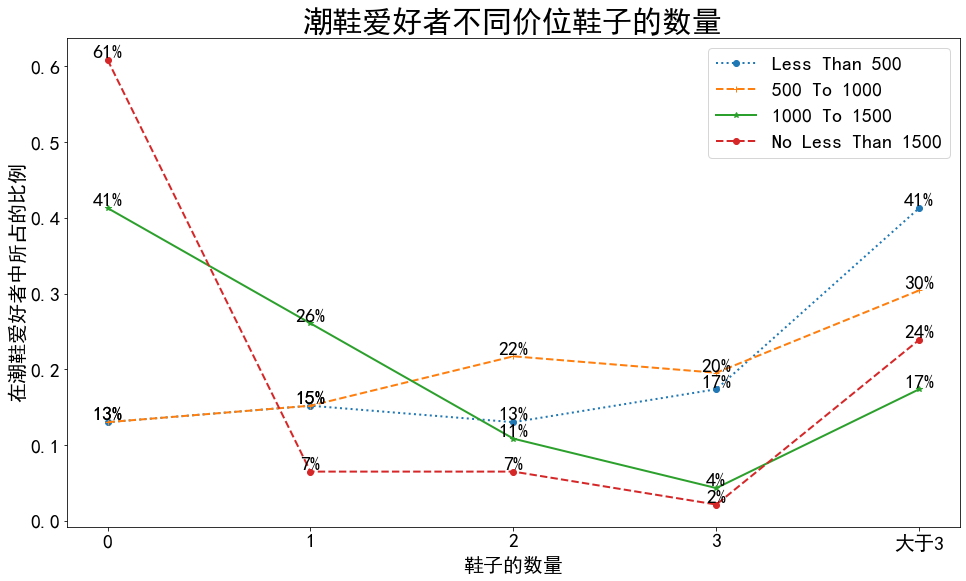

In [121]:
# 描述性统计——统计图 折线图
# 分析潮鞋爱好者 每个区间鞋子的数量 
shoelover_num_list = [shoelover_num_list[:5],shoelover_num_list[5:10],shoelover_num_list[10:15],shoelover_num_list[15:]]
shoelover_list = [shoelover_list[:5],shoelover_list[5:10],shoelover_list[10:15],shoelover_list[15:]]
fig = plt.figure(figsize=(16,9))
plt.plot(['0','1','2','3','大于3'],shoelover_list[0],linewidth=2,marker='o',linestyle=':',label='Less Than 500')
plt.plot(['0','1','2','3','大于3'],shoelover_list[1],linewidth=2,marker='+',linestyle='--',label='500 To 1000')
plt.plot(['0','1','2','3','大于3'],shoelover_list[2],linewidth=2,marker='*',linestyle='-',label='1000 To 1500')
plt.plot(['0','1','2','3','大于3'],shoelover_list[3],linewidth=2,marker='o',linestyle='dashed',label='No Less Than 1500')
plt_list = shoelover_list
x_index = ['0','1','2','3','大于3']
for mylist in plt_list:
    for i in range(len(x_index)):
        plt.text(x_index[i],mylist[i],s='{}%'.format(round(mylist[i]*100)),ha='center',va='bottom',fontsize=20,fontweight='bold')
plt.xlabel('鞋子的数量',fontsize=20,fontweight='bold')
plt.ylabel('在潮鞋爱好者中所占的比例',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.title('潮鞋爱好者不同价位鞋子的数量',fontsize=30,fontweight='bold')
plt.legend(loc=1,fontsize=20)
# plt.savefig('潮鞋爱好者不同价位鞋子的数量.png')
plt.show()

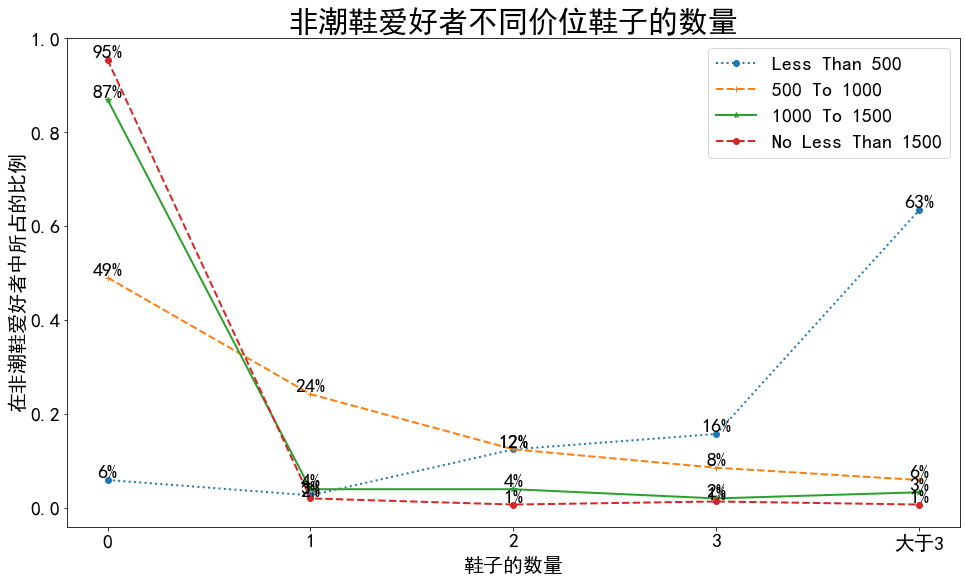

In [122]:
# 描述性统计——统计图 折线图
# 分析非潮鞋爱好者 每个区间鞋子的数量
nonshoelover_num_list = [nonshoelover_num_list[:5],nonshoelover_num_list[5:10],nonshoelover_num_list[10:15],nonshoelover_num_list[15:]]
nonshoelover_list = [nonshoelover_list[:5],nonshoelover_list[5:10],nonshoelover_list[10:15],nonshoelover_list[15:]]
fig = plt.figure(figsize=(16,9))
plt.plot(['0','1','2','3','大于3'],nonshoelover_list[0],linewidth=2,marker='o',linestyle=':',label='Less Than 500')
plt.plot(['0','1','2','3','大于3'],nonshoelover_list[1],linewidth=2,marker='+',linestyle='--',label='500 To 1000')
plt.plot(['0','1','2','3','大于3'],nonshoelover_list[2],linewidth=2,marker='*',linestyle='-',label='1000 To 1500')
plt.plot(['0','1','2','3','大于3'],nonshoelover_list[3],linewidth=2,marker='o',linestyle='dashed',label='No Less Than 1500')
plt_list = nonshoelover_list
x_index = ['0','1','2','3','大于3']
for mylist in plt_list:
    for i in range(len(x_index)):
        plt.text(x_index[i],mylist[i],s='{}%'.format(round(mylist[i]*100)),ha='center',va='bottom',fontsize=20,fontweight='bold')
plt.xlabel('鞋子的数量',fontsize=20,fontweight='bold')
plt.ylabel('在非潮鞋爱好者中所占的比例',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.title('非潮鞋爱好者不同价位鞋子的数量',fontsize=30,fontweight='bold')
plt.legend(loc=1,fontsize=20)
#plt.savefig('非潮鞋爱好者不同价位鞋子的数量.png')
plt.show()

In [123]:
# 推断统计——卡方分析 潮鞋爱好者与鞋子价格的关系
shoelover_below1000 = np.sum(np.array(shoelover_num_list[0][1:]))+np.sum(np.array(shoelover_num_list[1][1:]))
shoelover_over1000 = np.sum(np.array(shoelover_num_list[2][1:]))+np.sum(np.array(shoelover_num_list[3][1:]))
nonshoelover_below1000 = np.sum(np.array(nonshoelover_num_list[0][1:]))+np.sum(np.array(nonshoelover_num_list[1][1:]))
nonshoelover_over1000 = np.sum(np.array(nonshoelover_num_list[2][1:]))+np.sum(np.array(nonshoelover_num_list[3][1:]))
alpha = 0.025 
chi_value_criteria = 5.024 # 置信度为0.0975自由度为1时查表
chi_data = [
    [shoelover_below1000,shoelover_over1000],
    [nonshoelover_below1000,nonshoelover_over1000]
]
## 列联表
table = PrettyTable(['','鞋子价格在1000元以下','鞋子价格在1000元以上'])
table.add_row(['潮鞋爱好者','{}'.format(shoelover_below1000),'{}'.format(shoelover_over1000)])
table.add_row(['非潮鞋爱好者','{}'.format(nonshoelover_below1000),'{}'.format(nonshoelover_over1000)])
print(table)
## 进行卡方分析
chi_data = np.array(chi_data)
chi_value,p_value,freedom_deg,_ = scipy.stats.chi2_contingency(chi_data)
table = PrettyTable(['卡方值','p值','自由度'])
table.add_row(['{}'.format(round(chi_value,2)),'{}'.format(round(p_value,2)),'{}'.format(freedom_deg)])
print(table)
if chi_value < chi_value_criteria:
    print('潮鞋爱好者与鞋子价格没有显著的相关性')
else:
    print('潮鞋爱好者与鞋子价格有显著的相关性')

+--------------+----------------------+----------------------+
|              | 鞋子价格在1000元以下 | 鞋子价格在1000元以上 |
+--------------+----------------------+----------------------+
|  潮鞋爱好者  |          80          |          45          |
| 非潮鞋爱好者 |         222          |          27          |
+--------------+----------------------+----------------------+
+--------+-----+--------+
| 卡方值 | p值 | 自由度 |
+--------+-----+--------+
| 32.28  | 0.0 |   1    |
+--------+-----+--------+
潮鞋爱好者与鞋子价格有显著的相关性


均是支持洗鞋服务的(非)潮鞋爱好者

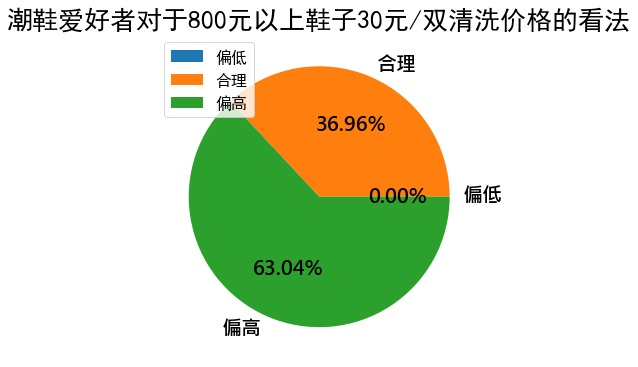

In [124]:
# 潮鞋爱好者对于800元以上鞋子的清洗价格
shoelover_low = shoelover[shoelover['ServicePriceOver800']==1] # 偏低
shoelover_med = shoelover[shoelover['ServicePriceOver800']==2] # 合理
shoelover_high = shoelover[shoelover['ServicePriceOver800']==3] # 偏高

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    shoelover_low.shape[0]*100/shoelover.shape[0],
    shoelover_med.shape[0]*100/shoelover.shape[0],
    shoelover_high.shape[0]*100/shoelover.shape[0]
]
name_list = ['偏低','合理','偏高']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('潮鞋爱好者对于800元以上鞋子30元/双清洗价格的看法',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=2)
#plt.savefig('潮鞋爱好者对于800元以上鞋子30元每双清洗价格的看法.png')
plt.show()

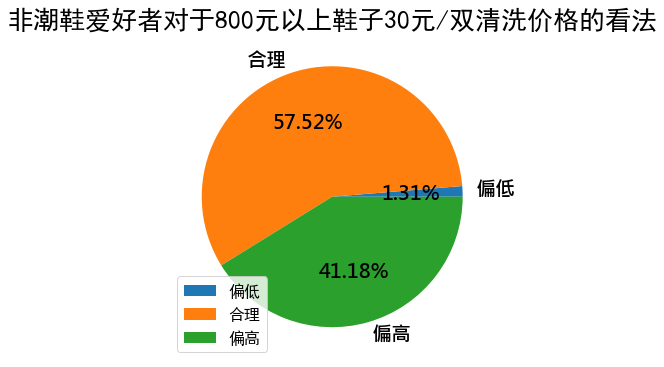

In [125]:
# 非潮鞋爱好者对于800元以上鞋子的清洗价格
nonshoelover_low = not_shoelover[not_shoelover['ServicePriceOver800']==1] # 偏低
nonshoelover_med = not_shoelover[not_shoelover['ServicePriceOver800']==2] # 合理
nonshoelover_high = not_shoelover[not_shoelover['ServicePriceOver800']==3] # 偏高

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    nonshoelover_low.shape[0]*100/not_shoelover.shape[0],
    nonshoelover_med.shape[0]*100/not_shoelover.shape[0],
    nonshoelover_high.shape[0]*100/not_shoelover.shape[0]
]
name_list = ['偏低','合理','偏高']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('非潮鞋爱好者对于800元以上鞋子30元/双清洗价格的看法',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=3)
#plt.savefig('非潮鞋爱好者对于800元以上鞋子30元每双清洗价格的看法.png')
plt.show()  

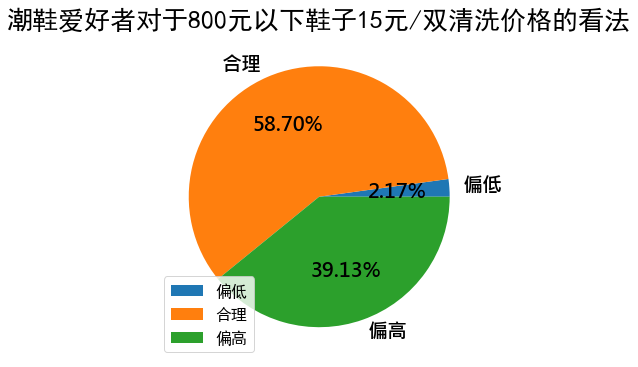

In [126]:
# 潮鞋爱好者对于800元以下鞋子的清洗价格
shoelover_low = shoelover[shoelover['ServicePriceBelow800']==1] # 偏低
shoelover_med = shoelover[shoelover['ServicePriceBelow800']==2] # 合理
shoelover_high = shoelover[shoelover['ServicePriceBelow800']==3] # 偏高

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    shoelover_low.shape[0]*100/shoelover.shape[0],
    shoelover_med.shape[0]*100/shoelover.shape[0],
    shoelover_high.shape[0]*100/shoelover.shape[0]
]
name_list = ['偏低','合理','偏高']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('潮鞋爱好者对于800元以下鞋子15元/双清洗价格的看法',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=3)
#plt.savefig('潮鞋爱好者对于800元以下鞋子15元每双清洗价格的看法.png')
plt.show()

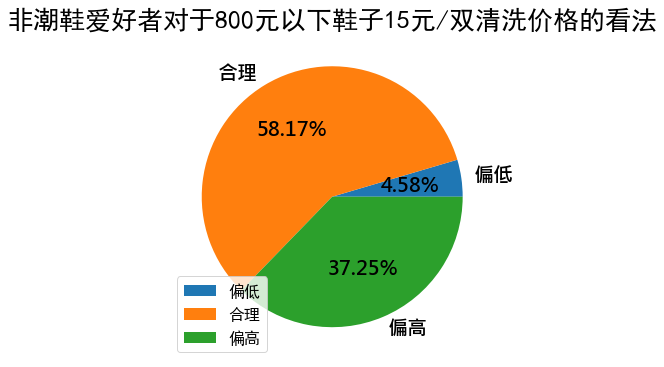

In [127]:
# 非潮鞋爱好者对于800元以下鞋子的清洗价格
nonshoelover_low = not_shoelover[not_shoelover['ServicePriceBelow800']==1] # 偏低
nonshoelover_med = not_shoelover[not_shoelover['ServicePriceBelow800']==2] # 合理
nonshoelover_high = not_shoelover[not_shoelover['ServicePriceBelow800']==3] # 偏高

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    nonshoelover_low.shape[0]*100/not_shoelover.shape[0],
    nonshoelover_med.shape[0]*100/not_shoelover.shape[0],
    nonshoelover_high.shape[0]*100/not_shoelover.shape[0]
]
name_list = ['偏低','合理','偏高']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':20,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('非潮鞋爱好者对于800元以下鞋子15元/双清洗价格的看法',fontsize=26,fontweight='bold')
plt.legend(fontsize=16,loc=3)
#plt.savefig('非潮鞋爱好者对于800元以下鞋子15元每双清洗价格的看法.png')
plt.show()  

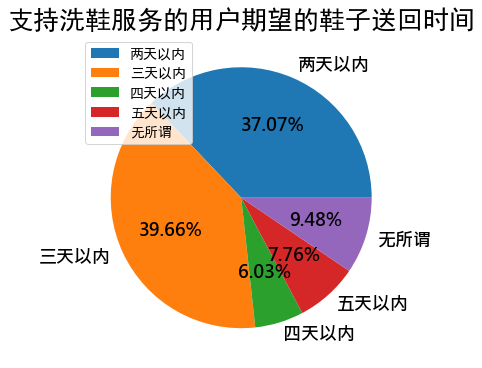

In [128]:
# 支持洗鞋服务的人 接受的鞋子送返时间
support_2d = support[support['ServiceTime']==1] # 两天以内
support_3d = support[support['ServiceTime']==2] # 三天以内
support_4d = support[support['ServiceTime']==3] # 四天以内
support_5d = support[support['ServiceTime']==4] # 五天以内
support_nocare = support[support['ServiceTime']==5] # 无所谓

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    support_2d.shape[0]*100/support.shape[0],
    support_3d.shape[0]*100/support.shape[0],
    support_4d.shape[0]*100/support.shape[0],
    support_5d.shape[0]*100/support.shape[0],
    support_nocare.shape[0]*100/support.shape[0]
]
name_list = ['两天以内','三天以内','四天以内','五天以内','无所谓']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':18,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('支持洗鞋服务的用户期望的鞋子送回时间',fontsize=26,fontweight='bold')
plt.legend(fontsize=14,loc=2)
#plt.savefig('支持洗鞋服务的用户期望的鞋子送回时间.png')
plt.show()  

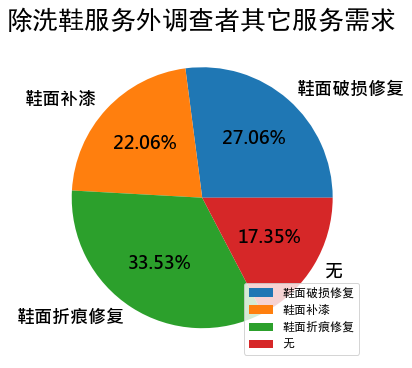

In [129]:
# 其它服务需求 
df_need_1 = df[df['DamageRecovery']==1]
df_need_2 = df[df['ShoePainting']==1]
df_need_3 = df[df['CreasesRecovery']==1]
df_need_4 = df[df['NoOtherNeed']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    df_need_1.shape[0]*100/df.shape[0],
    df_need_2.shape[0]*100/df.shape[0],
    df_need_3.shape[0]*100/df.shape[0],
    df_need_4.shape[0]*100/df.shape[0]
]
name_list = ['鞋面破损修复','鞋面补漆','鞋面折痕修复','无']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':18,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('除洗鞋服务外调查者其它服务需求',fontsize=26,fontweight='bold')
plt.legend(fontsize=12,loc=4)
#plt.savefig('除洗鞋服务外调查者其它服务需求.png')
plt.show()  

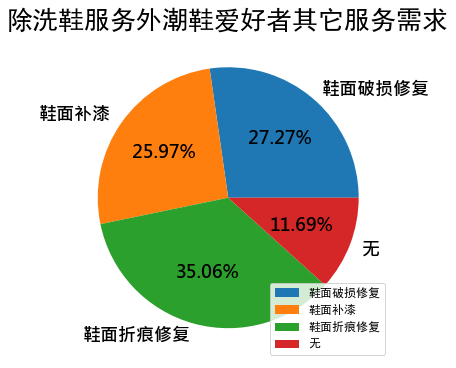

In [130]:
# 潮鞋爱好者其它服务需求 
df_need_1_shoelover = df_need_1[df_need_1['IfShoeLover']==1]
df_need_2_shoelover = df_need_2[df_need_2['IfShoeLover']==1]
df_need_3_shoelover = df_need_3[df_need_3['IfShoeLover']==1]
df_need_4_shoelover = df_need_4[df_need_4['IfShoeLover']==1]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    df_need_1_shoelover.shape[0]*100/shoelover.shape[0],
    df_need_2_shoelover.shape[0]*100/shoelover.shape[0],
    df_need_3_shoelover.shape[0]*100/shoelover.shape[0],
    df_need_4_shoelover.shape[0]*100/shoelover.shape[0]
]
name_list = ['鞋面破损修复','鞋面补漆','鞋面折痕修复','无']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':18,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('除洗鞋服务外潮鞋爱好者其它服务需求',fontsize=26,fontweight='bold')
plt.legend(fontsize=12,loc=4)
#plt.savefig('除洗鞋服务外调查者其它服务需求.png')
plt.show()  

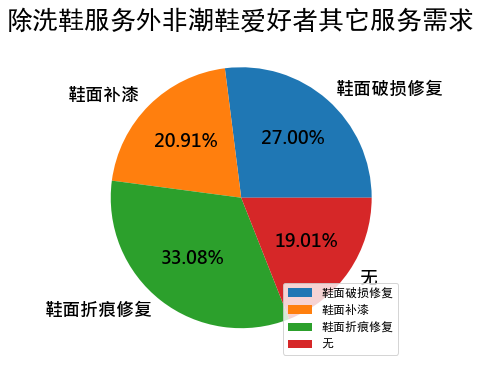

In [131]:
# 非潮鞋爱好者其它服务需求 
df_need_1_nonshoelover = df_need_1[df_need_1['IfShoeLover']==2]
df_need_2_nonshoelover = df_need_2[df_need_2['IfShoeLover']==2]
df_need_3_nonshoelover = df_need_3[df_need_3['IfShoeLover']==2]
df_need_4_nonshoelover = df_need_4[df_need_4['IfShoeLover']==2]

# 描述性统计——统计图 饼图
fig = plt.figure(figsize=(8,6))
num_list = [
    df_need_1_nonshoelover.shape[0]*100/not_shoelover.shape[0],
    df_need_2_nonshoelover.shape[0]*100/not_shoelover.shape[0],
    df_need_3_nonshoelover.shape[0]*100/not_shoelover.shape[0],
    df_need_4_nonshoelover.shape[0]*100/not_shoelover.shape[0]
]
name_list = ['鞋面破损修复','鞋面补漆','鞋面折痕修复','无']
plt.pie(
    x=num_list,
    labels=name_list,
    autopct='%.2f%%',
    textprops={
        'color':'black',
        'fontsize':18,
        'fontfamily':'Microsoft JhengHei',
        'fontweight':'bold'
    }
)
plt.title('除洗鞋服务外非潮鞋爱好者其它服务需求',fontsize=26,fontweight='bold')
plt.legend(fontsize=12,loc=4)
#plt.savefig('除洗鞋服务外调查者其它服务需求.png')
plt.show()  